<a href="https://colab.research.google.com/github/khngproj/Medical_Insurance_Data_Analysis_and_Machine_Learning_Models/blob/main/Medical_Insurance_Data_Analysis_%26_Machine_Learning_Models_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES**

---



In [ ]:
import pandas as pd
import numpy as np

# EDA and data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, pearsonr

# pipeline composition
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

# regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# model selection and hyperparameter tuning
from sklearn.model_selection import train_test_split, KFold, cross_val_score, ShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, PredictionErrorDisplay

# warnings
import warnings
warnings.filterwarnings('ignore')

# **DOWNLOAD DATASET FROM KAGGLE**

---





Mount Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Install Kaggle API

In [ ]:
pip install kaggle

Define Kaggle path

In [ ]:
kaggle_creds_path = '/content/drive/MyDrive/kaggle/kaggle.json'

Create '.kaggle' directory

In [ ]:
! rm -r ~/.kaggle # remove the '.kaggle' directory if it exists
! mkdir ~/.kaggle # create the '.kaggle' directory; ! used to run shell commands
! cp {kaggle_creds_path} ~/.kaggle/ # copy the kaggle API token to the '.kaggle' directory
! chmod 600 ~/.kaggle/kaggle.json # set permissions for the 'kaggle.json' file (600 - readable and writably only by file's owner)

rm: cannot remove '/root/.kaggle': No such file or directory


Download the zip file where the dataset is stored

In [ ]:
!kaggle datasets download -d teertha/ushealthinsurancedataset

Dataset URL: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset
License(s): CC0-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 22.9MB/s]


Unzip the zip file

In [ ]:
import zipfile

with zipfile.ZipFile('ushealthinsurancedataset.zip') as zip_ref:
  zip_ref.extractall('/content')

Import the insurance.csv file

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **EXPLORE THE DATASET**

## DUPLICATES

Find duplicates

In [ ]:
print('Number of duplicates:', df.duplicated().sum())

Number of duplicates: 1


Remove duplicates

In [ ]:
df = df.drop_duplicates()

Reset index

In [ ]:
df = df.reset_index(drop=True)

## GENERAL INFORMATION - COLUMN NAMES, NUMBER OF ENTRIES, AND DATA TYPES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


<b> Observations: </b> <br>
<ul>
  <li> The dataset contains 1337 rows (data points) and 7 columns (variables).</li>
  <li> Among 7 variables, there are 6 independent variables and 1 target variables ('charges').</li>
  <li> Each column has 1337 non-null values, indicating that the dataset does not have any missing value.</li>



Verify if the dataset has any missing value

In [ ]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<b> Observations:</b> <br>
We can conclude that there is no missing (null) value in the dataset.

# **UNIVARIATE EXPLORATORY DATA ANALYSIS**

## NUMERICAL VARIABLES

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


FUNCTION SUMMARY - SHOW THE SUMMARY AND DENSITY DISTRIBUTION OF NUMERICAL VARIABLE X

In [ ]:
def summary(x): # function summary() requires 1 argument x
  x_min = df[x].min()
  x_max = df[x].max()
  Q1 = df[x].quantile(0.25)
  Q2 = df[x].median()
  Q3 = df[x].quantile(0.75)

  print(f'5 Point Summary of \'{x}\' Variable:\n'
        f'Minimum: {x_min:,.2f}\n'
        f'First Quartile: {Q1:,.2f}\n'
        f'Median: {Q2:,.2f}\n'
        f'Third Quartile: {Q3:,.2f}\n'
        f'Maximum: {x_max:,.2f}')

  plt.figure(figsize=(10,5))
  sns.set_palette('pastel')

  # histogram
  plt.subplot(121) # create a 1x2 grid of subplots and select the top-left subplot for plotting
  ax1 = sns.histplot(df[x],
                     kde = True, # show the density curve
                     bins = 10, # number of bins to divide the data points
                     stat = 'count', # show the count of data points in each bin
                     color = 'r',
                     edgecolor = 'black') # set the edge color of the histogram

  # add skewness to the top right corner of the subplot
  skew = df[x].skew()
  ax1.text(0.95, 0.95, # specify text position
          f'Skewness: {skew:.3f}', # add the skewness value
          transform = ax1.transAxes, # transform the text to the axes coordinates
          fontsize = 12,
          verticalalignment = 'top',
          horizontalalignment = 'right',
          bbox = {'facecolor': 'white', 'alpha': 0.5, 'edgecolor':'none'} # format box around text
          )
  ax1.set_title(f'Histogram of \'{x}\'') # set title of the subplot
  ax1.set_xlabel(f'{x}') # set x-axis label
  ax1.set_ylabel('Count') # set y-axis label


  # box plot
  plt.subplot(122) # select the top-right subplot for plotting
  ax2 = sns.boxplot(x = df[x], palette = 'Accent')
  ax2.set_title(f'Box Plot of \'{x}\'') # set title of the subplot
  ax2.set_xlabel(f'{x}') # set x-axis label

  plt.tight_layout() # adjust the spacing between subplots
  plt.show()

  # comment on skewness of the distribution
  mean = df[x].mean()
  print(f'Mean = {mean:,.2f}')
  print(f'Median = {Q2:,.2f}')
  print(f'Skewness = {skew:.3f}')
  if abs(skew) > 1:
    if mean > Q2:
      print(f'\'{x}\' is highly right skewed.')
    else:
      print(f'\'{x}\' is highly negatively skewed.')
  elif abs(skew) > 0.5:
    if mean > Q2:
      print(f'\'{x}\' is moderately right skewed.')
    else:
      print(f'\'{x}\' is moderately negatively skewed.')
  else:
    print(f'\'{x}\' is approximately symmetric.')

  # outliers summary
  IQR = Q3 - Q1
  Lbound = Q1 - 1.5 * IQR
  Ubound = Q3 + 1.5 * IQR
  outliers = ((df[x] < Lbound) | (df[x] > Ubound)) # return a bool series indicating whether each value meets condition
  total_outlier_num = outliers.sum()
  print(f'Number of outliers in \'{x}\' distribution is {total_outlier_num}.')

CALL FUNCTION SUMMARY FOR AGE

5 Point Summary of 'age' Variable:
Minimum: 18.00
First Quartile: 27.00
Median: 39.00
Third Quartile: 51.00
Maximum: 64.00


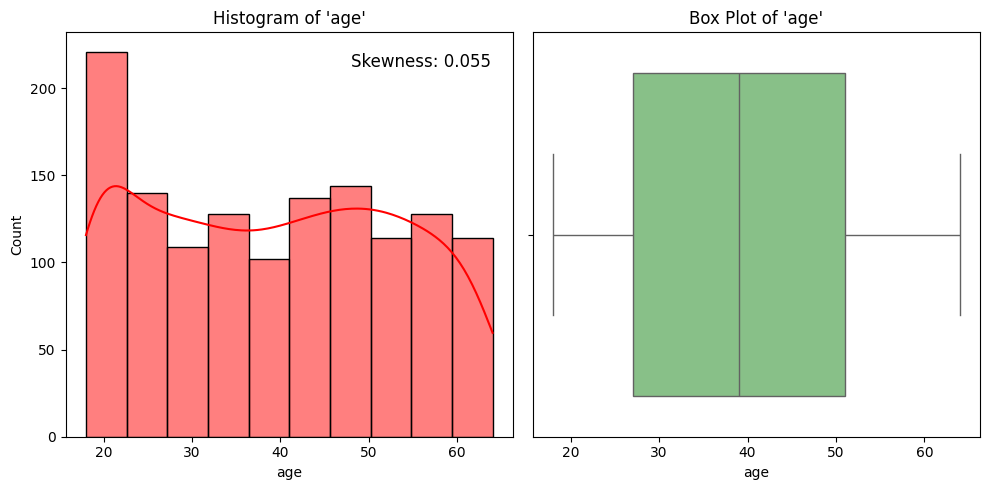

Mean = 39.22
Median = 39.00
Skewness = 0.055
'age' is approximately symmetric.
Number of outliers in 'age' distribution is 0.


In [ ]:
summary('age')

<b> Observations: </b> <br>
The histogram reveals that 'age' approximately follows a uniform distribution.

CALL FUNCTION SUMMARY FOR BMI

5 Point Summary of 'bmi' Variable:
Minimum: 15.96
First Quartile: 26.29
Median: 30.40
Third Quartile: 34.70
Maximum: 53.13


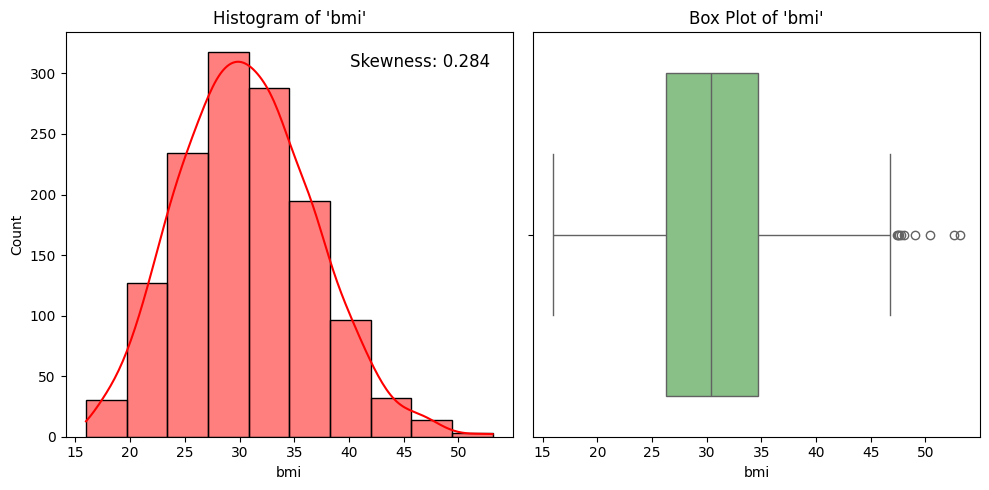

Mean = 30.66
Median = 30.40
Skewness = 0.284
'bmi' is approximately symmetric.
Number of outliers in 'bmi' distribution is 9.


In [ ]:
summary('bmi')

> Extract the insured with the highest BMI

In [ ]:
df[df['bmi'] == df['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1316,18,male,53.13,0,no,southeast,1163.4627


In [ ]:
round(df['charges'].mean(),2), round(df['charges'].median(),2)

(13279.12, 9386.16)

<b> Observations: </b> <br>
<ul>
  <li> The histogram reveals that 'bmi' approximately follows a normal distribution. </li>
  <li> All the outliers are on the higher side. </li>
  <li> The insured with the highest BMI is also one of the youngest non-smokers in the data. By common sense, his charges should be on the higher side. However, the actual charges are less than both the mean and median. It indicates that under general underwriting practice, while a high BMI does increase risk, being young and a non-smoker provides significant advantages. </li>
</ul>

CALL FUNCTION SUMMARY FOR CHARGES

5 Point Summary of 'charges' Variable:
Minimum: 1,121.87
First Quartile: 4,746.34
Median: 9,386.16
Third Quartile: 16,657.72
Maximum: 63,770.43


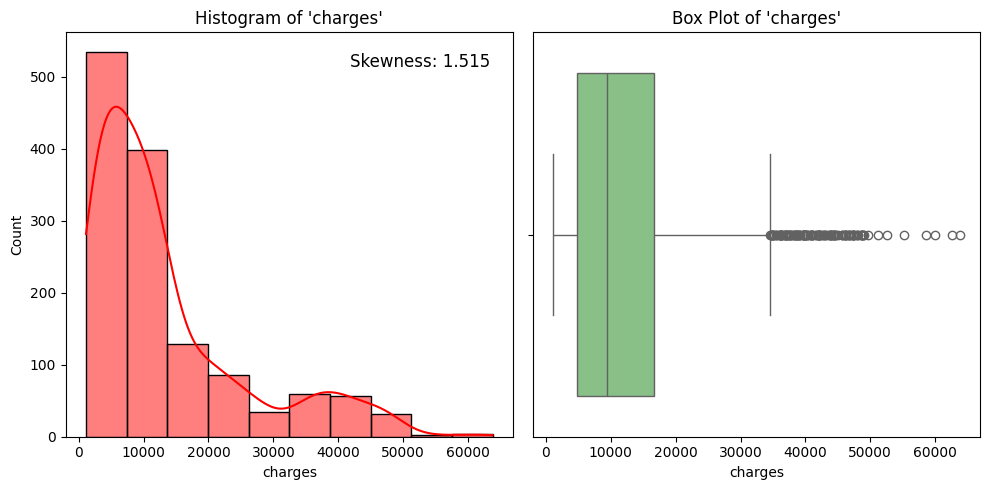

Mean = 13,279.12
Median = 9,386.16
Skewness = 1.515
'charges' is highly right skewed.
Number of outliers in 'charges' distribution is 139.


In [ ]:
summary('charges')

In [ ]:
df[df['charges'] == df['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


<b> Observations: </b> <br>
<ul>
  <li> The distribution of 'charges' is highly right skewed. The median is closer to the first quartile than to the third quartile, and the upper whisker is much longer than the lower whisker. This suggests that a log transformation could be useful to mitigate the skewness. </li>
  <li> All the outliers are on the higher side. </li>
    <li> The insured with the highest charges has relatively high bmi and is a smoker. </li>
</ul>

LOG-TRANSFORMATION TO THE CHARGES VARIABLE

In [ ]:
df['log_charges'] = np.log(df['charges'])

## CATEGORICAL VARIABLES

In [ ]:
df.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


PIE CHARTS

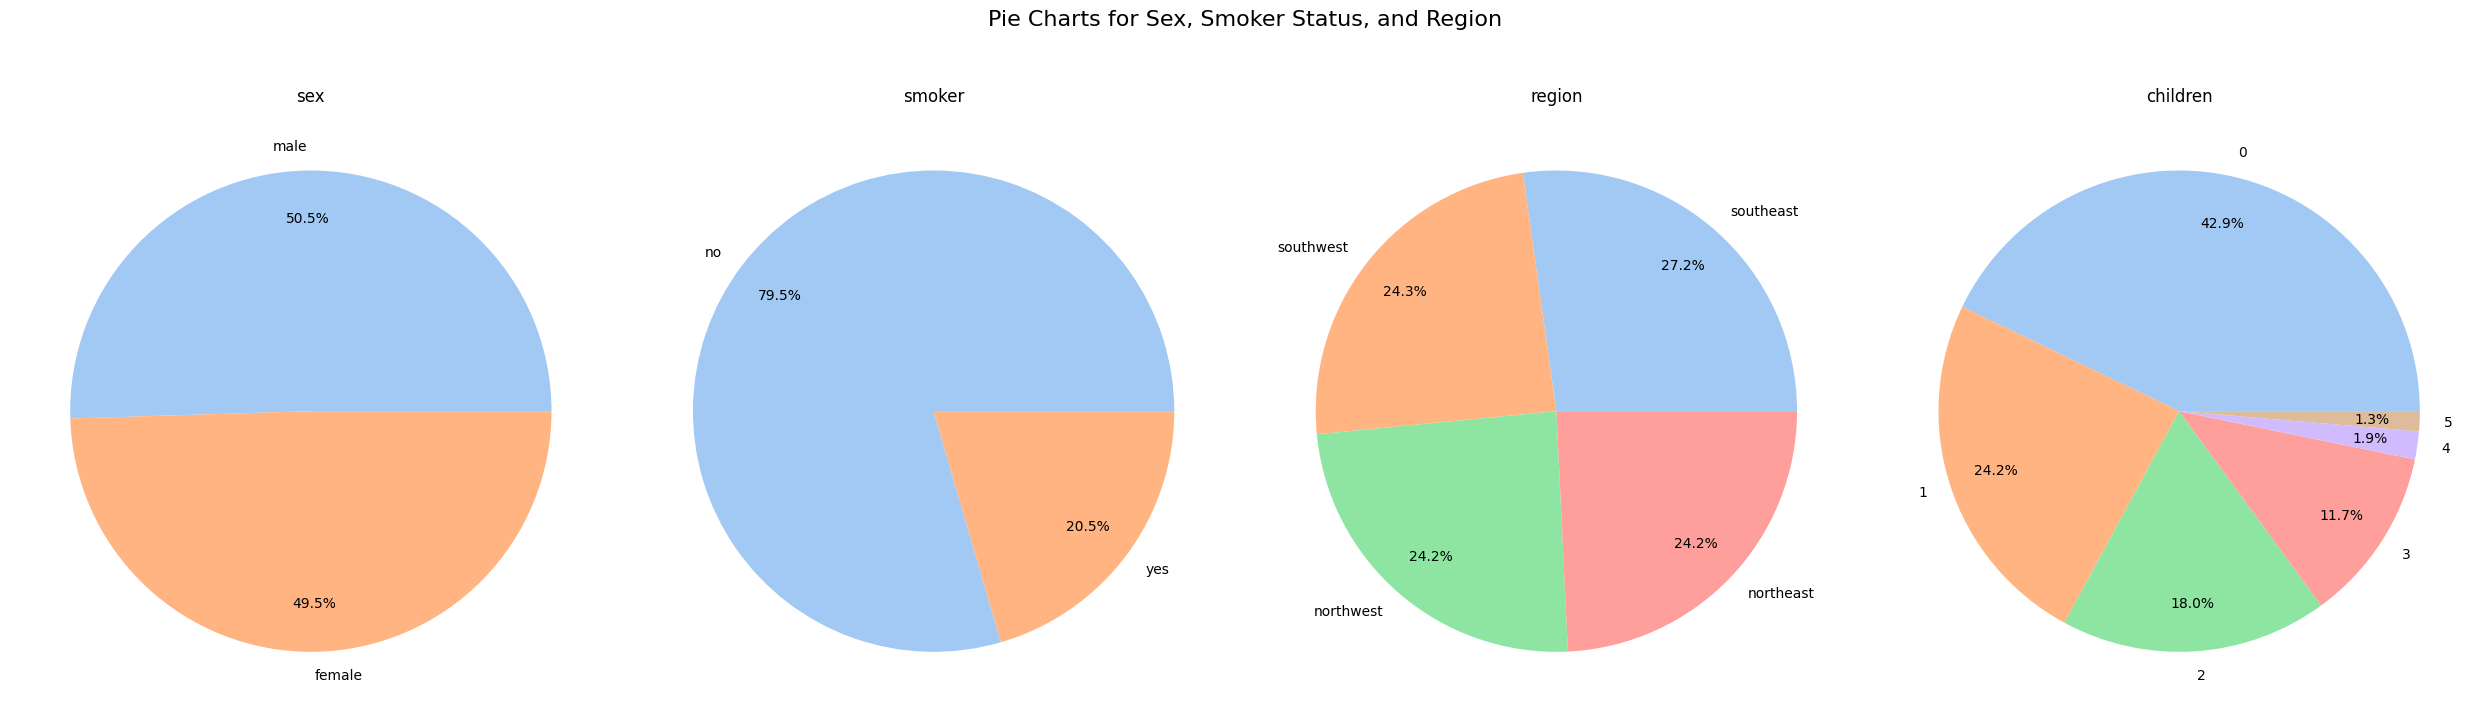

In [ ]:
cat_features = ['sex', 'smoker', 'region', 'children']

plt.figure(figsize=(25,8))

for i, col in enumerate(cat_features): # iterate over each column
  plt.subplot(1, 4, i+1) # create a single subplot at a specified grid position of a 1x3 grid
  plt.pie(df[col].value_counts(ascending = False), # plot the value counts of corresponding column
          labels = df[col].value_counts(ascending = False).index, # set categories of the column as labels
          colors = sns.color_palette('pastel'), # use Seaborn pastel color palette
          autopct = '%1.1f%%', # format the percentages inside pie chart
          pctdistance = 0.8, # move the percentages further away from the center, default = 0.6
          )
  plt.title(col) # set title of the subplot

plt.suptitle('Pie Charts for Sex, Smoker Status, and Region', fontsize=16) # set the overall title and position it closer to the charts
plt.tight_layout() # adjust the spacing between subplots
plt.show()

<b> Observations: </b> <br>
<ul>
  <li> The data points are equally distributed among sex and region. </li>
  <li> There are four times more non-smokers than smokers in the dataset.</li>
  <li> 85% of the insureds have less than 3 children.
</ul>

# **BIVARIATE EXPLORATORY DATA ANALYSIS**

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


BAR CHARTS



1.   charges



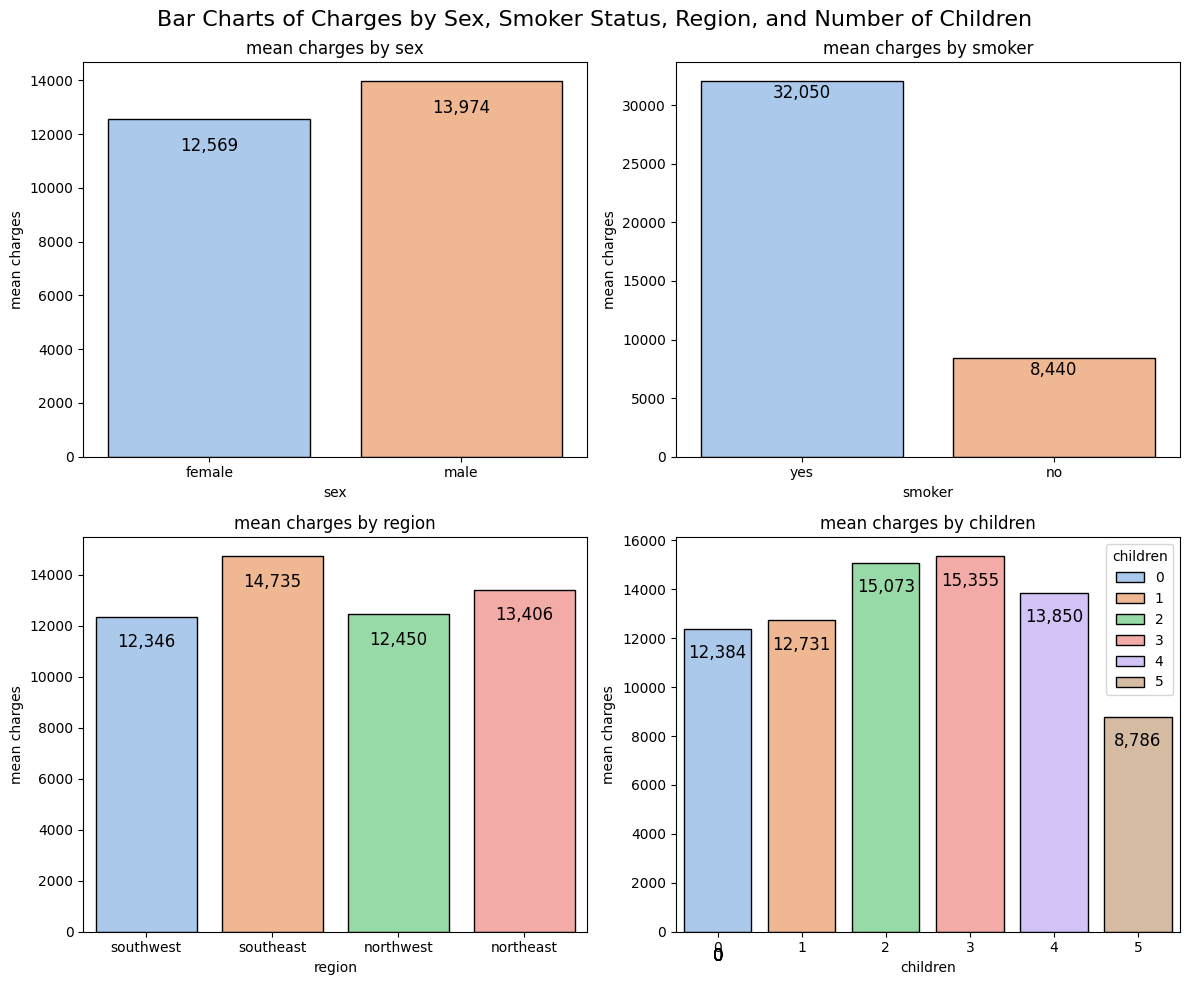

In [ ]:
features = ['sex', 'smoker', 'region', 'children']

plt.figure(figsize=(12,10))

for i, col in enumerate(features): # iterate over each column
  plt.subplot(2, 2, i+1) # create a single subplot at a specified grid position of a 2x2 grid

  # group data by the column and calculate the mean of 'charges' column
  agg_data = df.groupby(col)['charges'].mean().reset_index()
  # reset_index() converts the series to a dataframe where col becomes a column and the computed mean is in the log_charges column

  ax = sns.barplot(x = df[col], y = df['charges'],
              data = agg_data,
              hue = df[col],
              palette = 'pastel', # use Seaborn pastel color palette
              errorbar = None, # remove error bars
              edgecolor = 'black', # set the edge color of the bars
              )

  # add data labels to the bars
  for p in ax.patches: # iterate over each bar (patch) in the plot
    height = p.get_height() # get the height of the bar
    ax.text(p.get_x() + p.get_width() / 2., # calculate the x-coordinate for the label to center it over the bar
            height - 1000, # position the label slightly below the top of the bar
            f'{int(height):,}',
            ha = 'center', # horizontal alignment of the label
            va = 'center', # vertical alignment of the label
            fontsize = 12,
            color = 'black'
            )

  plt.title(f'mean charges by {col}') # set title of the subplot
  plt.xlabel(col) # set x-axis label
  plt.ylabel('mean charges') # set y-axis label

plt.suptitle('Bar Charts of Charges by Sex, Smoker Status, Region, and Number of Children', fontsize=16)
plt.tight_layout() # adjust the spacing between subplots
plt.show()

<b> Observations: </b>
<ul>
  <li> Charges are approximately the same across different categories of sex, region, and number of children. On average, </li>
  <ul type = 'circle'>
    <li> Males pay more for medical insurance than females. </li>
    <li> Insureds in the southeast region pay the highest premium charges. </li>
    <li> Insureds with 2 and 3 children pay the highest charges. </li>
  </ul>
  <li> Charges are three times higher for smokers than for non-smokers. </li>
</ul>

2.   log_charges


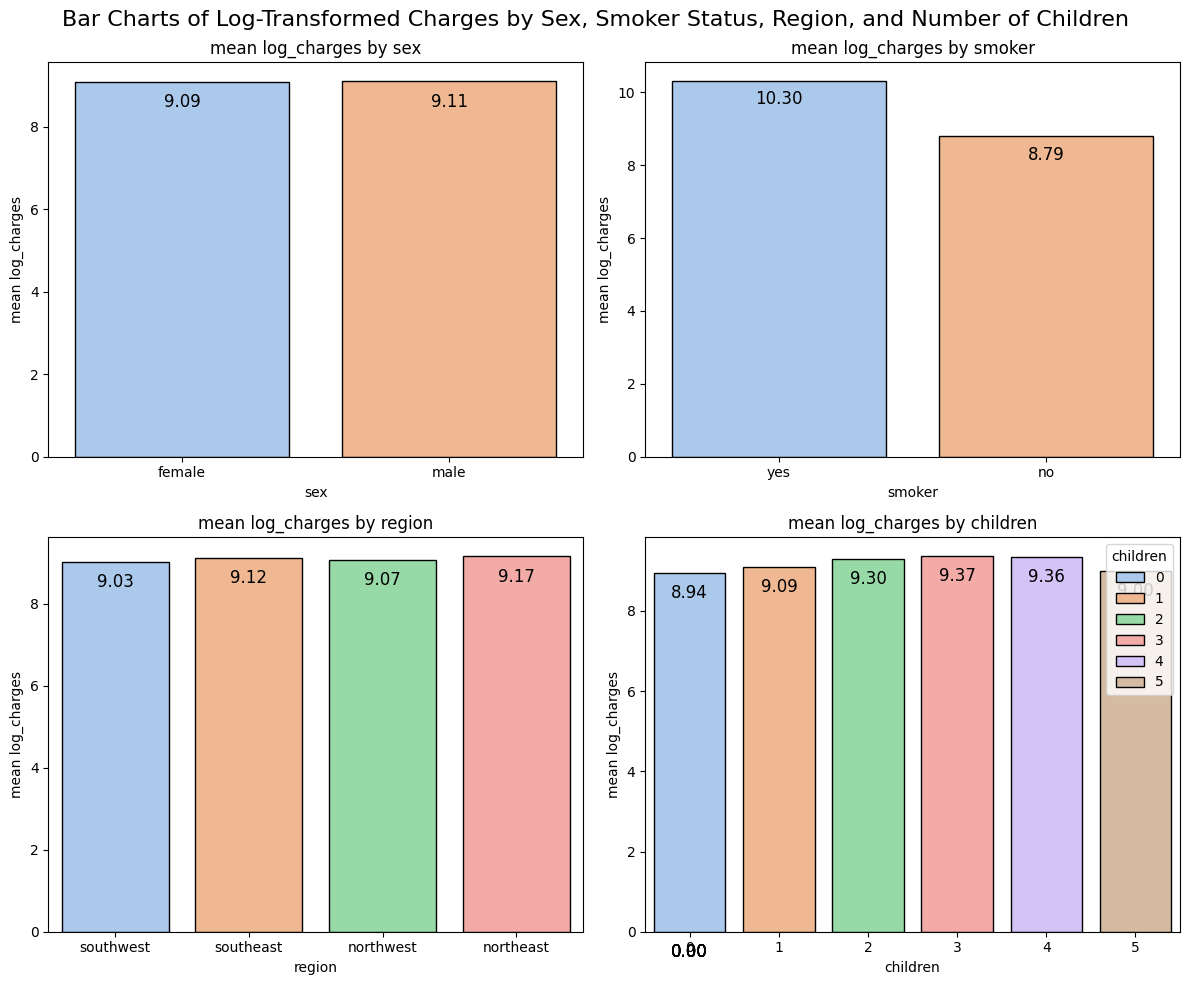

In [ ]:
features = ['sex', 'smoker', 'region', 'children']

plt.figure(figsize=(12,10))

for i, col in enumerate(features): # iterate over each column
  plt.subplot(2, 2, i+1) # create a single subplot at a specified grid position of a 2x2 grid

  # group data by the column and calculate the mean of 'log_charges' column
  agg_data = df.groupby(col)['log_charges'].mean().reset_index()
  # reset_index() converts the series to a dataframe where col becomes a column and the computed mean is in the log_charges column

  ax = sns.barplot(x = df[col], y = df['log_charges'],
              data = agg_data,
              hue = df[col],
              palette = 'pastel', # use Seaborn pastel color palette
              errorbar = None, # remove error bars
              edgecolor = 'black', # set the edge color of the bars
              )

  # add data labels to the bars
  for p in ax.patches: # iterate over each bar (patch) in the plot
    height = p.get_height() # get the height of the bar
    ax.text(p.get_x() + p.get_width() / 2., # calculate the x-coordinate for the label to center it over the bar
            height - 0.5, # position the label slightly above the top of the bar
            f'{height:.2f}',
            ha = 'center', # horizontal alignment of the label
            va = 'center', # vertical alignment of the label
            fontsize = 12,
            color = 'black'
            )

  plt.title(f'mean log_charges by {col}') # set title of the subplot
  plt.xlabel(col) # set x-axis label
  plt.ylabel('mean log_charges') # set y-axis label

plt.suptitle('Bar Charts of Log-Transformed Charges by Sex, Smoker Status, Region, and Number of Children', fontsize=16)
plt.tight_layout() # adjust the spacing between subplots
plt.show()

<b> Observations: </b>
<ul>
  <li> Overall, the differences are more prominent in the bar charts with charges than with log_charges because log tranformation has compressed the scale of the data. </li>
  <li> However, the observations still hold: </li>
  <ul type = 'circle'>
    <li> Charges are approximately the same across different categories of sex, region, and number of children. </li>
    <li> Charges are much higher for smokers and non-smokers. </li>
  </ul>
</ul>

BOX PLOTS


1.   charges

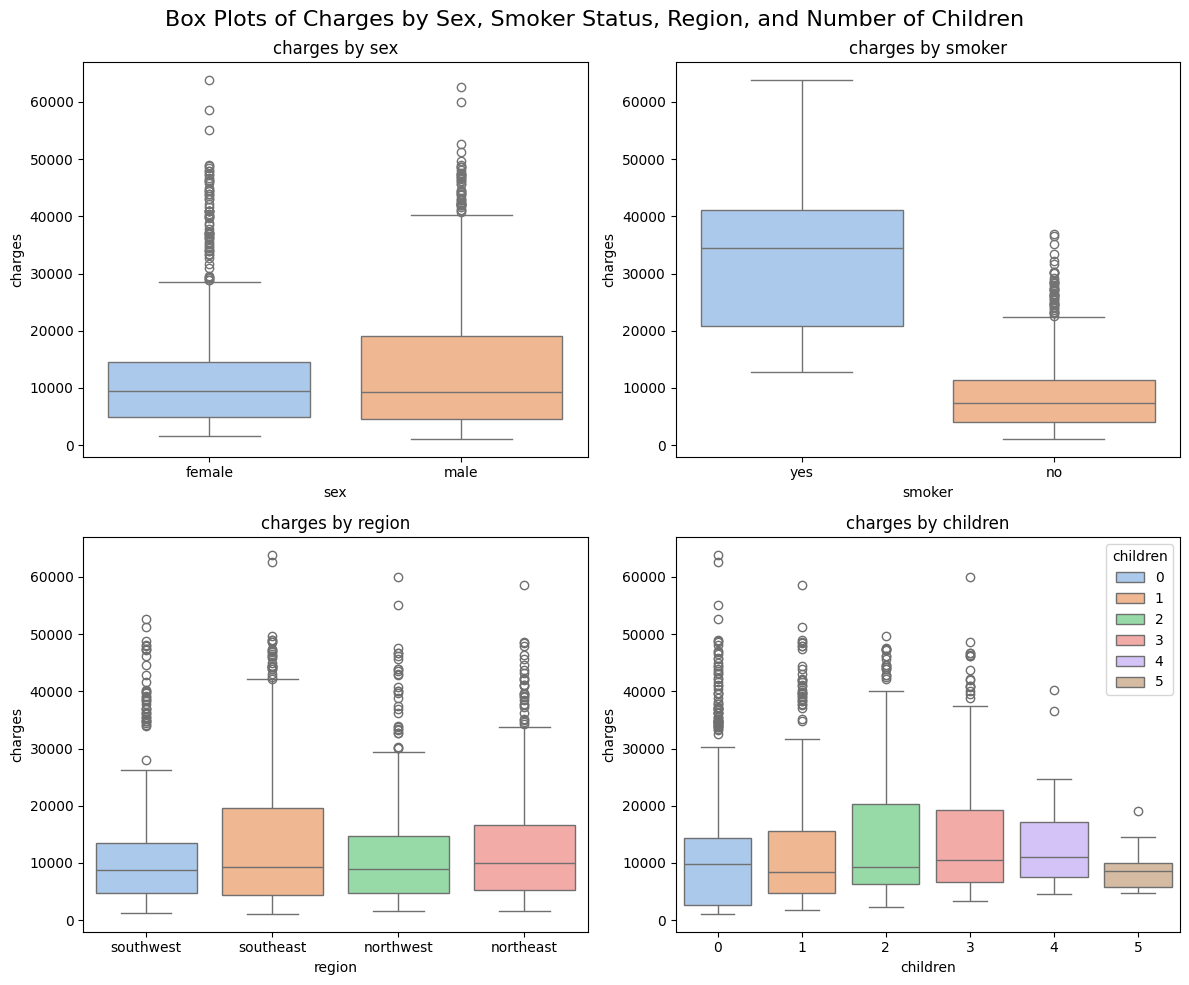

In [32]:
features = ['sex', 'smoker', 'region', 'children']

plt.figure(figsize=(12,10))

for i, col in enumerate(features): # iterate over each column
  plt.subplot(2, 2, i+1) # create a single subplot at a specified grid position of a 2x2 grid

  ax = sns.boxplot(x = df[col], y = df['charges'],
              hue = df[col],
              palette = 'pastel', # use Seaborn pastel color palette
              )

  plt.title(f'charges by {col}') # set title of the subplot
  plt.xlabel(col) # set x-axis label
  plt.ylabel('charges') # set y-axis label

plt.suptitle('Box Plots of Charges by Sex, Smoker Status, Region, and Number of Children', fontsize=16)
plt.tight_layout() # adjust the spacing between subplots
plt.show()

<b> Observations: </b>
<ul>
  <li> Median charges
  <ul type = 'circle'>
    <li> Median charges do not show substantial differences between male and female, across different regions, and among different number of children. </li>
    <li> Median charges for smokers are significantly higher than for non-smokers, indicating that smoker status is an important predictor of charges. </li>
  </ul>
  <li> Variability
  <ul type = circle'>
    <li> Sex: Charges for males exhibit greater variability compared to those for females. </li>
    <li> Smoker status: Charges for smokers exhibit greater variability compared to those for non-smokers. </li>
    <li> Region: Charges exhibit comparable variability across the regions, with charges in the southeast region being slightly more dispersed. </li>
    <li> Number of children: Charges exhibit comparable variability across most groups, though those for individuals with 5 children are slightly less dispersed. </li>
  </ul>
</ul>

2.   log_charges

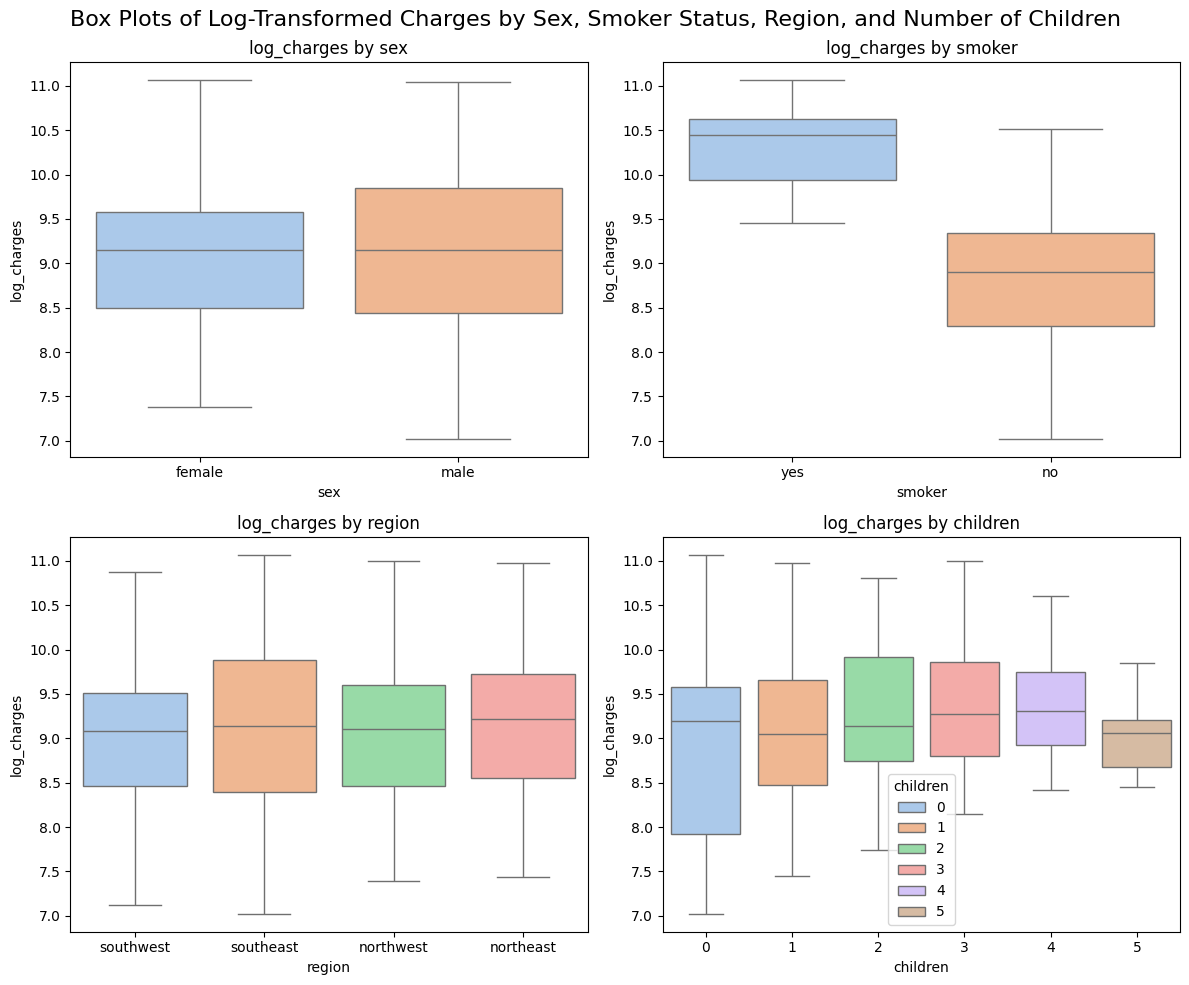

In [33]:
features = ['sex', 'smoker', 'region', 'children']

plt.figure(figsize=(12,10))

for i, col in enumerate(features): # iterate over each column
  plt.subplot(2, 2, i+1) # create a single subplot at a specified grid position of a 2x2 grid

  ax = sns.boxplot(x = df[col], y = df['log_charges'],
              hue = df[col],
              palette = 'pastel', # use Seaborn pastel color palette
              )

  plt.title(f'log_charges by {col}') # set title of the subplot
  plt.xlabel(col) # set x-axis label
  plt.ylabel('log_charges') # set y-axis label

plt.suptitle('Box Plots of Log-Transformed Charges by Sex, Smoker Status, Region, and Number of Children', fontsize=16)
plt.tight_layout() # adjust the spacing between subplots
plt.show()

SCATTERPLOTS

From the box plots, we have concluded that smoker status is an important predictor. Therefore, the scatterplots below show the relationship between age or bmi and charges where the data is split between smokers and non-smokers.




1.   charges



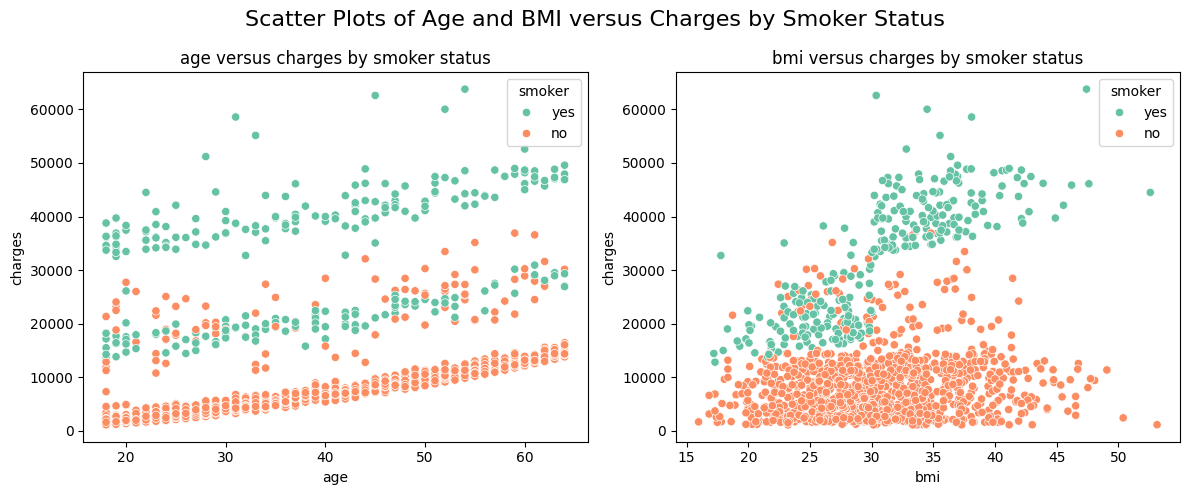

In [ ]:
features = ['age', 'bmi']

plt.figure(figsize=(12,5))

for i, col in enumerate(features): # iterate over each column
  plt.subplot(1, 2, i+1) # create a single subplot at a specified grid position of a 1x2 grid
  ax = sns.scatterplot(x = df[col], y = df['charges'],
                       hue = df['smoker'],
                       palette = 'Set2')
  ax.set_title(f'{col} versus charges by smoker status')
  ax.set_xlabel(col)
  ax.set_ylabel('charges')

plt.suptitle('Scatter Plots of Age and BMI versus Charges by Smoker Status', fontsize=16)
plt.tight_layout() # adjust the spacing between subplots
plt.show()

<b> Observations: </b>
<ul>
  <li> The left scatterplot reveals a similar relationship between age and charges based on whether the individual smokes.
  <ul type = 'circle'>
    <li> The moderately positive linear trend suggests that an increase in age results in higher charges, regardless of smoker status. </li>
    <li> However, charges for smokers are consistently higher than charges for non-smokers, regardless of age. </li>
  </ul>
  </li>
  <li> The right scatterplot reveals differing relationships between BMI and charges based on whether the individual smokes.
  <ul type = 'circle'>
    <li> For smokers, the positively linear trend suggests that an increase in BMI results in higher charges. </li>
    <li> For non-smokers, the linear relationship between BMI and charges is not apparent.
    </ul>
  </li>
</ul>

2.   log_charges

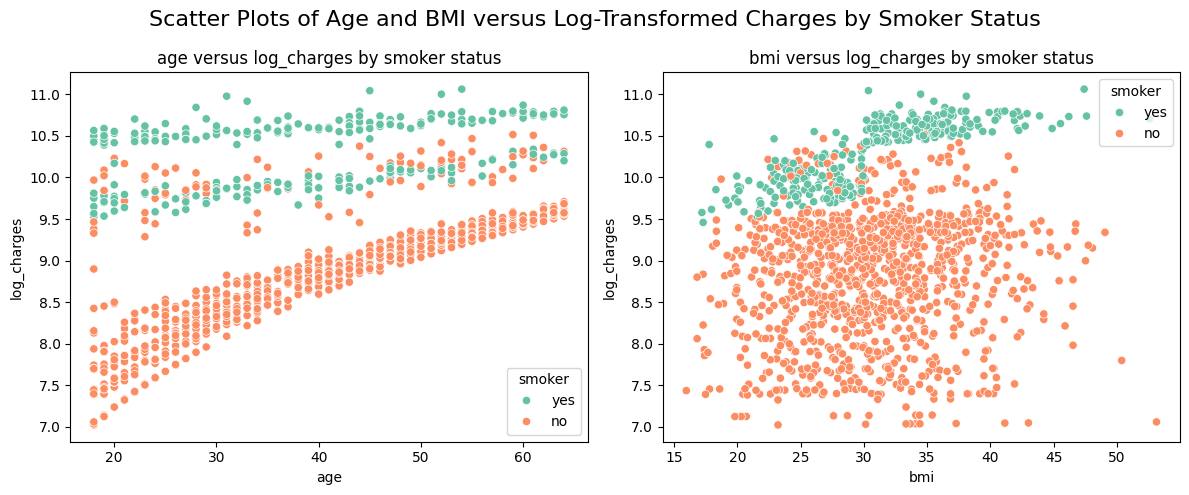

In [ ]:
features = ['age', 'bmi']

plt.figure(figsize=(12,5))

for i, col in enumerate(features): # iterate over each column
  plt.subplot(1, 2, i+1) # create a single subplot at a specified grid position of a 1x2 grid
  ax = sns.scatterplot(x = df[col], y = df['log_charges'],
                       hue = df['smoker'],
                       palette = 'Set2')
  ax.set_title(f'{col} versus log_charges by smoker status')
  ax.set_xlabel(col)
  ax.set_ylabel('log_charges')

plt.suptitle('Scatter Plots of Age and BMI versus Log-Transformed Charges by Smoker Status', fontsize=16)
plt.tight_layout() # adjust the spacing between subplots
plt.show()

<b> Observations: </b> <br>
With the effect of log transformation, the relationships we observed above are less pronounced, especially the relationship between age and charges for smokers. Also, the relationship between BMI and charges for non-smokers now appears to be random.

CORRELATION HEATMAPS

Transform Categorical Variables to Numerical Variables using Category Codes

In [34]:
from pandas.api.types import CategoricalDtype # convert to ordered categorical type with custom ordering

# define categorical data type with specific categories
sex_type = CategoricalDtype(categories = ['male', 'female'], ordered = True)
smoker_type = CategoricalDtype(categories = ['no', 'yes'], ordered = True)
region_type = CategoricalDtype(categories = ['northeast', 'northwest', 'southeast', 'southwest'], ordered = True)

# convert categorical variables to ordered categorical type
df['sex'] = df['sex'].astype(sex_type)
df['smoker'] = df['smoker'].astype(smoker_type)
df['region'] = df['region'].astype(region_type)

# iterate over each categorical column, print categories and corresponding category codes, then convert to category codes
for col in ['sex', 'smoker', 'region']:
  # print categories and corresponding category codes
  print(f'Column: {col}')
  categories = df[col].cat.categories
  codes = df[col].cat.codes
  print(f"{'Category':<12} {'Code':<5}")
  print('-' * 17)
  for category in categories:
    print(f'{category:<12} {codes[df[col] == category].iloc[0]:<5}')

  # convert to category codes
  df[col] = df[col].cat.codes # convert to numerical codes

Column: sex
Category     Code 
-----------------
male         0    
female       1    
Column: smoker
Category     Code 
-----------------
no           0    
yes          1    
Column: region
Category     Code 
-----------------
northeast    0    
northwest    1    
southeast    2    
southwest    3    


In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,1,27.900,0,1,3,16884.92400,9.734176
1,18,0,33.770,1,0,2,1725.55230,7.453302
2,28,0,33.000,3,0,2,4449.46200,8.400538
3,33,0,22.705,0,0,1,21984.47061,9.998092
4,32,0,28.880,0,0,1,3866.85520,8.260197


Correlation Heatmap among All Variables

<Axes: >

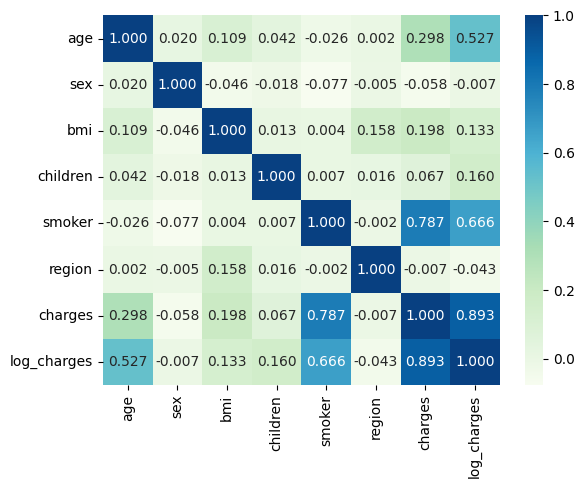

In [36]:
sns.heatmap(df.corr(),
            cmap = 'GnBu', # specify colormap name
            annot = True, # write data value in each cell
            fmt = '.3f', # string format when adding annotations
            cbar = True)

<b> Observations: </b> <br>
From the correlation heatmap, premium charges show a weak positive correlation with age and bmi of the insured, and a strong positive correlation with smoker status.

Correlation Heatmap among Variables Split by Smoker Status

In [37]:
# group data by smoker status
grouped_data = df.groupby('smoker')

# create mapping dictionary for each group in the grouped data
mapping = {1: 'Smokers', 0: 'Non-smokers'}

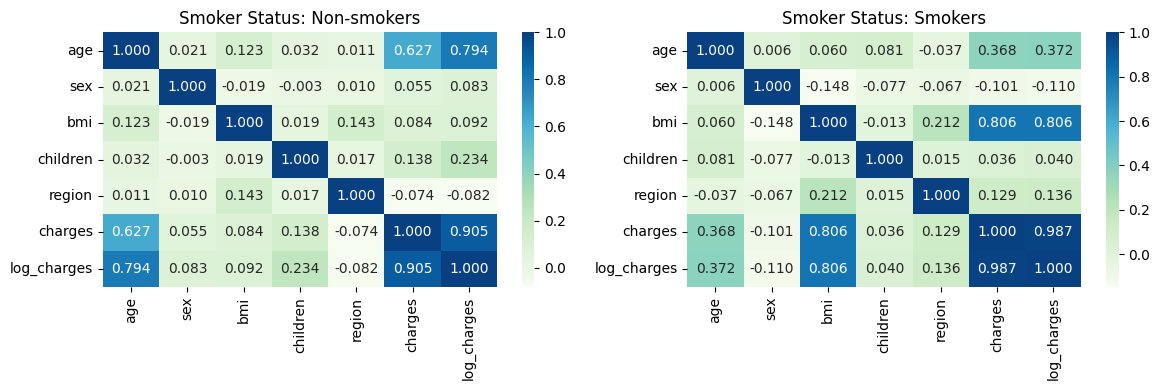

In [39]:
# set up the plt figure
fig, axs = plt.subplots(figsize=(12,4), nrows=1, ncols=2)

# pair each group with an axis for simultaneous iteration
targets = zip(grouped_data.groups.keys(), axs.flatten())

# for each group, compute the correlation matrix and plot it as a heatmap
for i, (key, ax) in enumerate(targets):
  sns.heatmap(grouped_data.get_group(key).corr().drop(index = ['smoker'], columns = ['smoker']), # remove 'smoker' row and column in the heatmap
              ax = ax, # position each heatmap to its corresponding axes
              cmap = 'GnBu', # specify colormap name
              annot = True, # write data value in each cell
              fmt = '.3f', # string format when adding annotations
              cbar = True) # draw a color bar
  ax.set_title(f'Smoker Status: {mapping.get(key, key)}') # if the key is not found in the mapping, defaults to original key

plt.tight_layout()
plt.show()

<b> Observations: </b>
<ul>
  <li> For non-smokers, premium charges show a stronger positive correlation with age (0.298 -> 0.627). </li>
  <li> For smokers, premium charges show a slightly stronger positive correlation with age (0.298 -> 0.368) and a notably stronger positive correlation with bmi (0.198 -> 0.806). </li>
</ul>

# **MODEL DEVELOPMENT**

## LINEAR REGRESSION

### LINEAR REGRESSION ON ENTIRE DATASET

Define Vectors of Independent Variables and Target Variable

In [40]:
X = df.drop(columns = ['charges', 'log_charges'])
y = df['log_charges']

Define vector of all independent variables

In [41]:
X_all = X.copy()

Run Ordinary Least Squares Linear Regression using <b>statsmodel</b> Package



In [42]:
# add constant to predictor variables
X_all_statsmodels = sm.add_constant(X_all)

# run OLS regression and print summary table
lr_all_statsmodels = sm.OLS(y, X_all_statsmodels).fit()
print(lr_all_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     728.4
Date:                Thu, 12 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:40:40   Log-Likelihood:                -810.37
No. Observations:                1337   AIC:                             1635.
Df Residuals:                    1330   BIC:                             1671.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9715      0.071     98.116      0.0

<b> Observations: </b> <br>
At 0.05 significance level, all variables are statistically significant because p-values < 0.05. Smoker status has the greatest coefficient estimate in absolute value.

### TRAIN LINEAR REGRESSION ON TRAINING DATA AND VALIDATE ON TEST DATA

<b> Background </b>

In evaluating model performance, Validation Set Approach is widely used. The original data set is randomly split into training and test data subsets. The training set is fit to the model, which then uses the error rate from the test set to evaluate the model performance on new, unseen data.

TRAINING AND TEST DATA SPLIT

In [43]:
# 80% training, 20% test
Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop(columns = ['charges', 'log_charges']), # X
                                                 df['charges'], # Y
                                                 test_size = 0.2,
                                                 random_state = 26)

LINEAR REGRESSION PIPELINE

In [44]:
continuous_features = ['age', 'bmi']
discrete_features = ['children', 'sex', 'smoker', 'region']

pipeline_lr = make_pipeline(
    make_column_transformer( # apply different transformations to different types of features
        (StandardScaler(), continuous_features), # standardize continuous features
         ('passthrough', discrete_features) # keep the discrete features unchanged since they have been transformed to categorical codes
    ),
    TransformedTargetRegressor( # transform target variable
        regressor = LinearRegression(), # apply linear regression to the transformed target variable
        func = np.log, # log-transform target variable to address skewness issue
        inverse_func = np.exp # after making predictions, results are transformed back to the original scale
        )
)

GRID SEARCH PROCEDURE

Define Parameter Grid and Grid Searcher

In [46]:
# determine whether StandardScaler or MinMaxScaler works better
param_grid = {'columntransformer__transformers':
 [
              [('standardscaler', StandardScaler(), ['age', 'bmi']),
               ('passthrough', 'passthrough', ['children', 'sex', 'smoker', 'region'])],
              [('minmaxscaler', MinMaxScaler(), ['age', 'bmi']),
               ('passthrough', 'passthrough', ['children', 'sex', 'smoker', 'region'])]
]
              }

# define data splitter to split data intro training and test sets multiple times
data_splitter = ShuffleSplit(test_size = 0.2, random_state = 26)

# define grid searcher
grid_searcher = GridSearchCV(estimator = pipeline_lr, # regressor to be optimized
                             param_grid = param_grid, # specify parameter space
                             cv = data_splitter) # specify cross-validation scheme

Fit Grid Searcher on Training Data

In [48]:
grid_searcher.fit(Xtrain, ytrain)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=26, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['children',
                                                                          'sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('transformedtargetregressor',
                                        TransformedTargetRegressor(func=<...c 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression()))]),
             param_grid={'columntransformer__transformers': [[('standardscaler',
                                                               StandardScaler(),
                                                               ['age', 'bmi']),
                                                              ('passthrough',
                                                               'passthrough',
                                                               ['children',
                                                                'sex', 'smoker',
                                                                'region'])],
                                                             [('minmaxscaler',
                                                               MinMaxScaler(),
                                                               ['age', 'bmi']),
                                                              ('passthrough',
                                                               'passthrough',
                                                               ['children',
                                                                'sex', 'smoker',
                                                                'region'])]]})

Grid Searcher Results

In [49]:
grid_searcher.best_params_

{'columntransformer__transformers': [('minmaxscaler',
   MinMaxScaler(),
   ['age', 'bmi']),
  ('passthrough', 'passthrough', ['children', 'sex', 'smoker', 'region'])]}

<b>Observations:</b>

Based on the results of the grid searcher, applying MinMaxScaler() to age and BMI is better.

In [50]:
best_lr_model = grid_searcher.best_estimator_
best_lr_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['age', 'bmi']),
                                                 ('passthrough', 'passthrough',
                                                  ['children', 'sex', 'smoker',
                                                   'region'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=LinearRegression()))])

PREDICTION ERRORS

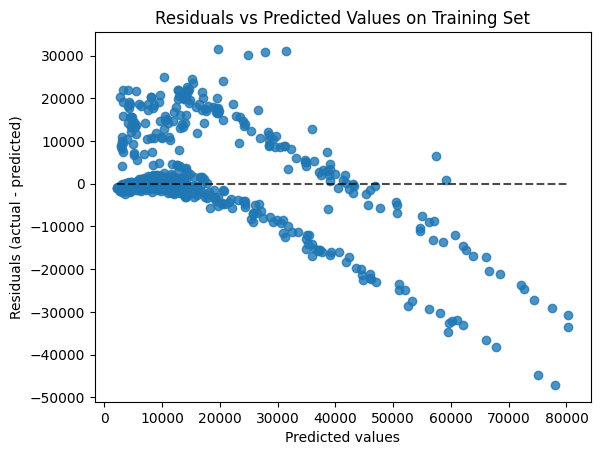

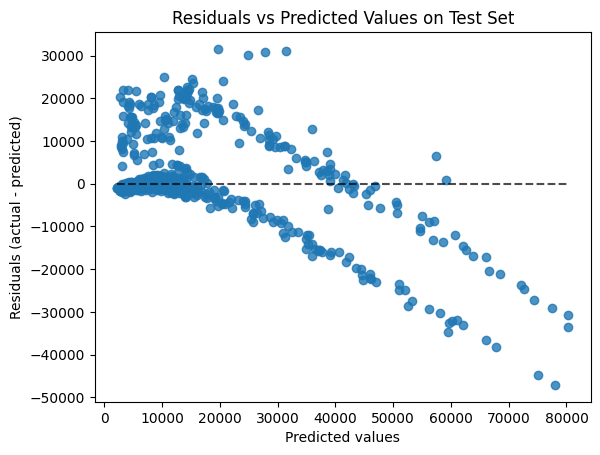

In [51]:
# calculate predictions
ytrain_pred = best_lr_model.predict(Xtrain)
ytest_pred = best_lr_model.predict(Xtest)

# prediction error plots
lr_pred_error_plot1 = PredictionErrorDisplay(y_true = ytrain, y_pred = ytrain_pred)
lr_pred_error_plot1.plot();
plt.title('Residuals vs Predicted Values on Training Set')

lr_pred_error_plot2 = PredictionErrorDisplay(y_true = ytest, y_pred = ytest_pred)
lr_pred_error_plot1.plot();
plt.title('Residuals vs Predicted Values on Test Set')

plt.show()

<b>Observations:</b>

  <li> The residual plots show that our model performs well but sometimes underestimates the predictions when the predicted premium charges are less than 20,000. When the predicted premium charges increase beyond 20,000, the errors start to linearly decrease, and the predicted values are higher than the actual values.</li>
  <li> Overall, due to the limited data points, it is difficult to make definitive conclusion about the model.</li>

<b> Model Performance Metrics </b>

We use the following metrics to evaluate the model performance.

1.   <b>R-squared and Adjusted R-squared</b>: R-squared measures the proportion of variation explained by the predictors. The greater the R-squared value, the better the model. However, R-squared always increases as more predictors get added to the model. Therefore, Adjusted R-squared is a better metric because it penalizes the addition of unnecessary variables.  
2. <b>Mean Absolute Error (MAE)</b>: MAE measures the average of the absolute differences between the actual and predicted values. MAE is straightforward and easy to calculate.
3. <b>Mean Squared Error (MSE)</b>: MSE measures the average of the squared differences between the actual and predicted values. Since MSE gives more weight to large errors, it is useful in penalizing large errors more than small ones, reflecting the true accuracy of the model better. However, MSE is much more sensitive to outliers than MAE.
4. <b>Root Mean Squared Error (RMSE)</b>: RMSE is the square root of MSE. It has the same unit as the target variable, making it easier to compare. While RMSE still penalizes large errors like MSE, it is less sensitive to outliers. We will use RMSE for the cross-validation score.





SUMMARY OF MODEL PERFORMANCE METRICS

In [52]:
# metric names
metric_names = ['mean_squared_error', 'mean_absolute_error', 'r2_score']

# training metrics
training_metrics = [metric(ytrain, ytrain_pred) for metric in [mean_squared_error, mean_absolute_error, r2_score]]

# test metrics
test_metrics = [metric(ytest, ytest_pred) for metric in [mean_squared_error, mean_absolute_error, r2_score]]

# k-fold cross validation score
k = 10 # define the number of folds
kf = KFold(n_splits = k,
            shuffle = True, # randomize the order of the data points
            random_state = 26) # ensure that the shuffling is consistent across multiple runs
train_kf_cvscore = cross_val_score(best_lr_model, Xtrain, ytrain, cv = kf, scoring = 'neg_mean_squared_error') # perform k-fold cross validation
test_kf_cvscore = cross_val_score(best_lr_model, Xtest, ytest, cv = kf, scoring = 'neg_mean_squared_error') # perform k-fold cross validation
train_rmse = np.sqrt(np.mean(np.absolute(train_kf_cvscore)))
test_rmse = np.sqrt(np.mean(np.absolute(test_kf_cvscore)))

# populate results dictionary
metric_names.append('Cross-Validation RMSE')
training_metrics.append(train_rmse)
test_metrics.append(test_rmse)

# summary
pd.options.display.float_format = '{:,.2f}'.format
lr_metrics_summary = pd.DataFrame({'Training Metrics': training_metrics,
                                   'Test Metrics': test_metrics},
                                  index = metric_names)
lr_metrics_summary

,Training Metrics,Test Metrics
mean_squared_error,"68,907,212.99","70,737,581.21"
mean_absolute_error,"4,155.75","4,422.06"
r2_score,0.52,0.56
Cross-Validation RMSE,"8,404.43","8,854.33"


<b>Observations:</b>

The training and test MSE and MAE are comparable, meaning that the model generalizes well on unseen data. However, the R-squared value shows that the model only explains approximately 50% of the variance in the dataset.

FEATURE IMPORTANCE

In [53]:
# create a 1D ndarray for the coefficients with corresponding feature names
feature_importance = pd.Series(
    data = best_lr_model.named_steps['transformedtargetregressor'].regressor_.coef_, # coefficients of fitted regressor
    index = best_lr_model.named_steps['columntransformer'].get_feature_names_out() # names of features seen during fit
).sort_values(ascending = False)

print(feature_importance)

minmaxscaler__age        1.60
passthrough__smoker      1.54
minmaxscaler__bmi        0.47
passthrough__children    0.09
passthrough__sex         0.07
passthrough__region     -0.05
dtype: float64


<Axes: title={'center': 'Feature Importance for Linear Regression Model'}>

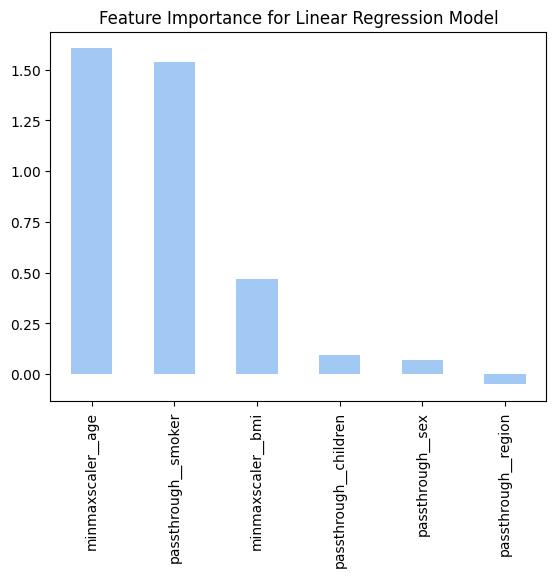

In [54]:
feature_importance.plot(kind = 'bar', title = 'Feature Importance for Linear Regression Model')

<b>Observations:</b>

This is consistent with our EDA results. The features of the highest importance are age, smoker status, and BMI.

## COMPARE REGRESSION MODELS

<b>Model Types</b>

1.   <b>Linear Regression</b>: Linear regression attempts to model the relationship between a target variable and a group of predictors by fitting a linear equation to observed data. The method of 'least squares' forms the best-fit line by minimizing the sum of squares of the difference between the predicted and actual values of the target variable.

2.   <b>Ridge/Lasso Regression</b>: Including more predictors, especially those that are highly correlated with the existing predictors, in the linear regression model will likely result in overfitting. Ridge and Lasso regressions introduce a penalty constraint on the size of the coefficients in the attempt to minimize the effect of overfitting. Unlike Ridge, Lasso employs variable selection, which leads to the shrinkage of some coefficients to zero.

3.   <b>Decision Tree</b>: Decision tree trains a model in the structure of a tree, which mimics human decision-making process. Decision trees may be prone to bias and overfitting, so pruning may be required to improve the model performance.

4.   <b>Random Forest</b>: Random forest combines the outputs of multiple decision trees to reach a single prediction. By average the results of multiple decision trees, random forest regression model reduces the risk of bias and overfitting, improving the model predictions.

5.   <b>Extreme Gradient Boosting (XGB)</b>: Gradient boosting technique builds predictive models in a sequential manner by combining predictions of multiple weak models in order to generate a collectively strong model. XGB is the optimized form of the gradient boosting algorithm and therefore performs better and faster. XGB incorporates regularization techniques such as shrinkage to reduce overfitting. XGB also employs tree pruning algorithms to control the size of the member decision trees, which reduces overfiting and improves computational efficiency.




<b> K-fold Cross Validation </b>

The Validation Set Approach that we used above has two disadvantages.

1.   Our estimate of the test error greatly depends on which observations are included in the training set and which observations are included in the test set. A different split may result in a vastly different model.

2.   This approach tends to reserves a good number of observations for the test set, which means the model is trained on fewer observations and may not perform as well as the model fit on the entire dataset. As a result, the test error rate for the model fit on the training set only may overestimate the test error rate for the model trained on the entire dataset.

K-Fold Cross Validation Approach helps mitigate these shortcomings.

*   We will randomly split our dataset into k folds. 1 fold will be used as the test set, and the remaining k-1 folds will be used as the training set.
*   Each time the model is fit on the training set, the model performance measure (e.g., mean squared error, R-squared) is computed on the test set.
*   The procedure is repeated k times and produces k measures.
*   The k-fold cross validation score is the average of the k measures.

This method is more robust because it ensures that every data point is used in both training and validation sets, which helps reduce the impact of data variability.










FUNCTION GET_MODEL - CALCULATE PERFORMANCE METRICS

In [55]:
def get_model(Xtrain, ytrain, Xval, yval, model_types):
  # create dictionary to store performance metrics
  results = {'Model': [],
           'Train Accuracy': [],
           'Test Accuracy': [],
           'MSE': [],
           'MAE': [],
           'Cross-Validation RMSE': []
           }

  for model_type in model_types:
    # define model object
    match model_type:
      case 'linear_regression':
        model = LinearRegression()
      case 'ridge_regression':
        model = Ridge()
      case 'lasso_regression':
        model = Lasso()
      case 'decision_tree':
        model = DecisionTreeRegressor()
      case 'random_forest':
        model = RandomForestRegressor()
      case 'xgboost':
        model = XGBRegressor()
      case _:
        raise ValueError(f'Invalid model type: {model_type}')

    model.fit(Xtrain, ytrain) # fit the model
    ypred = model.predict(Xtest) # model predictions

    # calculate accuracy
    r2_train = model.score(Xtrain, ytrain)
    adj_r2_train = 1 - (1 - r2_train) * (Xtrain.shape[0] - 1) / (Xtrain.shape[0] - Xtrain.shape[1] - 1)

    r2_test = r2_score(ytest, ypred)
    adj_r2_test = 1 - (1 - r2_test) * (Xtest.shape[0] - 1) / (Xtest.shape[0] - Xtest.shape[1] - 1)

    # evaluate model
    mse = mean_squared_error(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)

    # k-fold cross validation
    k = 10 # define the number of folds
    kf = KFold(n_splits = k,
            shuffle = True, # randomize the order of the data points
            random_state = 26) # ensure that the shuffling is consistent across multiple runs
    kf_cvscore = cross_val_score(model, Xtrain, ytrain, cv = kf, scoring = 'neg_mean_squared_error') # perform k-fold cross validation
    rmse = np.sqrt(np.mean(np.absolute(kf_cvscore)))

    # populate results dictionary
    results['Model'].append(model_type)
    results['Train Accuracy'].append(adj_r2_train)
    results['Test Accuracy'].append(adj_r2_test)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['Cross-Validation RMSE'].append(rmse)

  # print performance metrics in table format
  results_df = pd.DataFrame(results).sort_values(by = 'Cross-Validation RMSE', ascending = True)
  print(results_df)

CALL FUNCTION GET_MODEL ON 6 SELECTED MODEL TYPES

In [ ]:
model_types = ['linear_regression', 'ridge_regression', 'lasso_regression', 'decision_tree', 'random_forest', 'xgboost']
get_model(Xtrain, ytrain, Xtest, ytest, model_types)

               Model  Train Accuracy  Test Accuracy           MSE      MAE  \
4      random_forest            0.98           0.86 22,692,474.30 2,452.45   
5            xgboost            1.00           0.84 25,096,055.56 2,748.26   
2   lasso_regression            0.75           0.74 40,480,473.53 4,518.36   
0  linear_regression            0.75           0.74 40,480,435.62 4,517.79   
1   ridge_regression            0.75           0.74 40,471,840.09 4,527.38   
3      decision_tree            1.00           0.76 38,603,450.86 2,799.48   

   Cross-Validation RMSE  
4               4,907.57  
5               5,324.93  
2               6,019.74  
0               6,019.90  
1               6,020.26  
3               6,442.58  


<b>Observations:</b>

The random forest model appears to be the best among our 6 regression models. The random forest model produces the highest adjusted R-squared (i.e., explains 86% of the variance in the dataset) and the lowest prediction errors, including MSE, MAE, and cross-validation RMSE.

We will develop a random forest pipeline with the optimal values of hyperparameters. Hyperparameter tuning is done using RandomizedSearchCV. Random search is preferable in this case because it can explore a broader space of hyperparameters by randomly sampling values from predefined ranges.

## RANDOM FOREST

### HYPERPARAMETER TUNING

RANDOM FOREST REGRESSION PIPELINE

In [57]:
pipeline_rf = make_pipeline(
    make_column_transformer( # apply different transformations to different types of features
        (StandardScaler(), continuous_features), # standardize continuous features
         ('passthrough', discrete_features) # keep the discrete features unchanged since they have been transformed to categorical codes
    ),
    TransformedTargetRegressor( # transform target variable
        regressor = RandomForestRegressor(), # apply random forest regression to the transformed target variable
        func = np.log, # log-transform target variable to address skewness issue
        inverse_func = np.exp # after making predictions, results are transformed back to the original scale
        )
)

RANDOM SEARCH PROCEDURE

Define Hyperparameter Space

In [56]:
# number of trees in random forest
n_estimators = np.arange(start = 10, stop = 90, step = 8).tolist()

# number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in a tree
max_depth = np.arange(start = 2, stop = 6, step = 1).tolist()

# minimum number of observations required to split a node
min_sample_split = np.arange(start = 2, stop = 7, step = 1).tolist()

# minimum number of observations in a leaf node
min_sample_leaf = np.arange(start = 1, stop = 6, step = 1).tolist()

# method of selecting samples for training each tree
bootstrap = [True, False]

Create Parameter Grid

In [59]:
params = {'transformedtargetregressor__regressor__n_estimators': n_estimators,
          'transformedtargetregressor__regressor__max_features': max_features,
          'transformedtargetregressor__regressor__max_depth': max_depth,
          'transformedtargetregressor__regressor__min_samples_split': min_sample_split,
          'transformedtargetregressor__regressor__min_samples_leaf': min_sample_leaf,
          'transformedtargetregressor__regressor__bootstrap': bootstrap
          }
print(params)

{'transformedtargetregressor__regressor__n_estimators': [10, 18, 26, 34, 42, 50, 58, 66, 74, 82], 'transformedtargetregressor__regressor__max_features': ['auto', 'sqrt', 'log2'], 'transformedtargetregressor__regressor__max_depth': [2, 3, 4, 5], 'transformedtargetregressor__regressor__min_samples_split': [2, 3, 4, 5, 6], 'transformedtargetregressor__regressor__min_samples_leaf': [1, 2, 3, 4, 5], 'transformedtargetregressor__regressor__bootstrap': [True, False]}


Create Random Searcher

In [60]:
# define data splitter to split data intro training and test sets multiple times
data_splitter = ShuffleSplit(test_size = 0.2, random_state = 26)

# define random searcher
random_searcher = RandomizedSearchCV(estimator = pipeline_rf,
                                     param_distributions = params,
                                     cv = data_splitter,
                                     n_jobs = 10) # number of jobs to run in parallel

Fit Random Searcher on Training Data

In [61]:
random_searcher.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=26, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'bmi']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['children',
                                                                                'sex',
                                                                                'smoker',
                                                                                'region'])])),
                                             ('transformedtargetregressor',
                                              TransformedTargetRegressor(...
                                        'transformedtargetregressor__regressor__max_depth': [2,
                                                                                             3,
                                                                                             4,
                                                                                             5],
                                        'transformedtargetregressor__regressor__max_features': ['auto',
                                                                                                'sqrt',
                                                                                                'log2'],
                                        'transformedtargetregressor__regressor__min_samples_leaf': [1,
                                                                                                    2,
                                                                                                    3,
                                                                                                    4,
                                                                                                    5],
                                        'transformedtargetregressor__regressor__min_samples_split': [2,
                                                                                                     3,
                                                                                                     4,
                                                                                                     5,
                                                                                                     6],
                                        'transformedtargetregressor__regressor__n_estimators': [10,
                                                                                                18,
                                                                                                26,
                                                                                                34,
                                                                                                42,
                                                                                                50,
                                                                                                58,
                                                                                                66,
                                                                                                74,
                                                                                                82]})

Random Searcher Results

In [62]:
best_rf_params = random_searcher.best_params_
best_rf_params

{'transformedtargetregressor__regressor__n_estimators': 74,
 'transformedtargetregressor__regressor__min_samples_split': 3,
 'transformedtargetregressor__regressor__min_samples_leaf': 3,
 'transformedtargetregressor__regressor__max_features': 'log2',
 'transformedtargetregressor__regressor__max_depth': 5,
 'transformedtargetregressor__regressor__bootstrap': False}

In [63]:
best_rf_model = random_searcher.best_estimator_
best_rf_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('passthrough', 'passthrough',
                                                  ['children', 'sex', 'smoker',
                                                   'region'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(bootstrap=False,
                                                                            max_depth=5,
                                                                            max_features='log2',
                                                                            min_samples_leaf=3,
                                                                            min_samples_split=3,
                                                                            n_estimators=74)))])

### FINAL MODEL

FINAL RANDOM FOREST REGRESSION MODEL WITH TUNED HYPERPARAMETERS

In [65]:
best_rf_model.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('passthrough', 'passthrough',
                                                  ['children', 'sex', 'smoker',
                                                   'region'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(bootstrap=False,
                                                                            max_depth=5,
                                                                            max_features='log2',
                                                                            min_samples_leaf=3,
                                                                            min_samples_split=3,
                                                                            n_estimators=74)))])

PREDICTION ERRORS

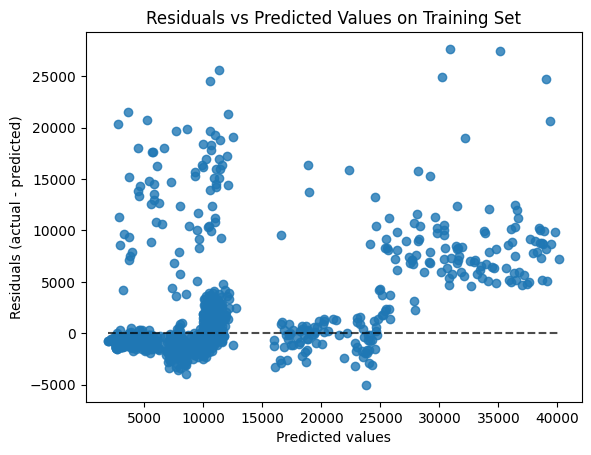

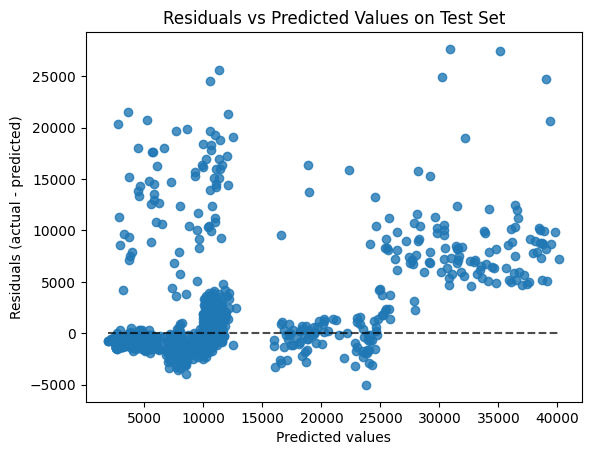

In [66]:
# calculate predictions
ytrain_pred = best_rf_model.predict(Xtrain)
ytest_pred = best_rf_model.predict(Xtest)

# prediction error plots
lr_pred_error_plot1 = PredictionErrorDisplay(y_true = ytrain, y_pred = ytrain_pred)
lr_pred_error_plot1.plot();
plt.title('Residuals vs Predicted Values on Training Set')

lr_pred_error_plot2 = PredictionErrorDisplay(y_true = ytest, y_pred = ytest_pred)
lr_pred_error_plot1.plot();
plt.title('Residuals vs Predicted Values on Test Set')

plt.show()

<b>Observations:</b>

Despite the limited number of data points, the residual plots indicate that the random forest regression model fits the data better than the linear regression model, as the residuals exhibit a pattern more consistent with random variation.

SUMMARY OF MODEL PERFORMANCE METRICS

In [67]:
# metric names
metric_names = ['mean_squared_error', 'mean_absolute_error', 'r2_score']

# training metrics
training_metrics = [metric(ytrain, ytrain_pred) for metric in [mean_squared_error, mean_absolute_error, r2_score]]

# test metrics
test_metrics = [metric(ytest, ytest_pred) for metric in [mean_squared_error, mean_absolute_error, r2_score]]

# k-fold cross validation score
k = 10 # define the number of folds
kf = KFold(n_splits = k,
            shuffle = True, # randomize the order of the data points
            random_state = 26) # ensure that the shuffling is consistent across multiple runs
train_kf_cvscore = cross_val_score(best_rf_model, Xtrain, ytrain, cv = kf, scoring = 'neg_mean_squared_error') # perform k-fold cross validation
test_kf_cvscore = cross_val_score(best_rf_model, Xtest, ytest, cv = kf, scoring = 'neg_mean_squared_error') # perform k-fold cross validation
train_rmse = np.sqrt(np.mean(np.absolute(train_kf_cvscore)))
test_rmse = np.sqrt(np.mean(np.absolute(test_kf_cvscore)))

# populate results dictionary
metric_names.append('Cross-Validation RMSE')
training_metrics.append(train_rmse)
test_metrics.append(test_rmse)

# summary
pd.options.display.float_format = '{:,.2f}'.format
rf_metrics_summary = pd.DataFrame({'Training Metrics': training_metrics,
                                   'Test Metrics': test_metrics},
                                  index = metric_names)
rf_metrics_summary

,Training Metrics,Test Metrics
mean_squared_error,"28,221,848.48","34,006,438.81"
mean_absolute_error,"2,977.61","3,338.10"
r2_score,0.80,0.79
Cross-Validation RMSE,"5,746.90","6,065.39"


<b>Observations:</b>

Compared with the linear regression model, the random forest regression model performs much better. The error metrics (i.e., MSE, MAE, and cross-validation RMSE) decreased significantly while higher R-squared indicates that the variance explained by this model improves by approximately 30%.